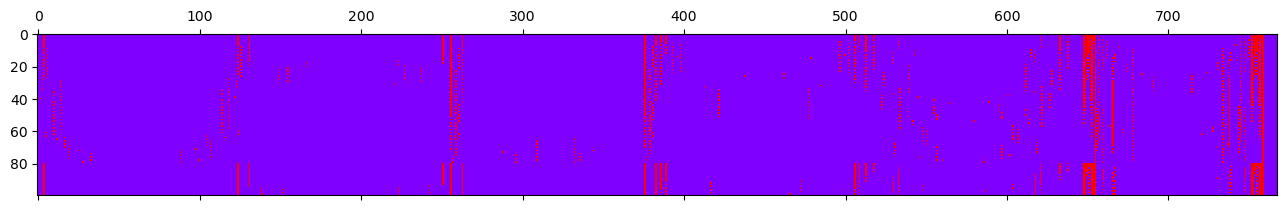

In [2]:
import numpy as np

rng = np.random.default_rng(42)

from chess2vec import load_prepared
import gzip
from matplotlib import pyplot as plt
from pca import idxarr_tocsc

with gzip.open("data/bin/lichess_elite_2024-04_indices", "rt") as f:
    demo = load_prepared(f, count=100)
    mat = load_prepared(f, count=10_000)

plt.matshow(idxarr_tocsc(demo, 768).todense(), cmap=plt.cm.rainbow)

In [ ]:
from pca import jaccard

jc = jaccard(mat, cols=768)

np.save(f"data/C{len(mat)//1000}k", jc)

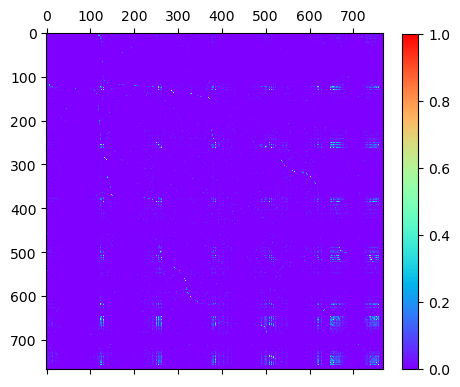

In [1]:
import numpy as np
from matplotlib import pyplot as plt

jc = np.load("data/C10k.npy")

img = plt.matshow(jc, cmap=plt.cm.rainbow)

plt.colorbar(img, fraction=0.045)

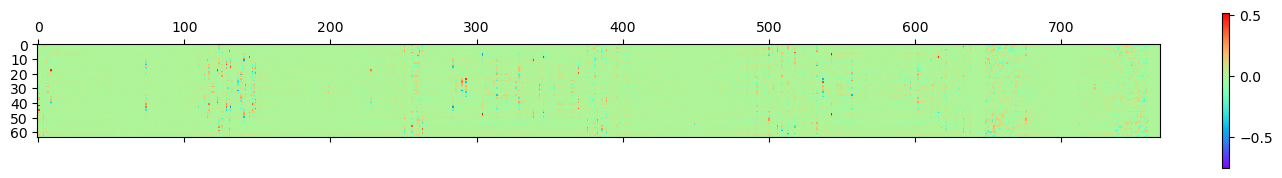

In [2]:
from scipy.sparse.linalg import eigsh

w, v = eigsh(jc, k=64)

img = plt.matshow(v.T, cmap=plt.cm.rainbow)

plt.colorbar(img, fraction=0.045)